In [14]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

In [16]:
x #before transforming

array([-3.29215704,  0.79952837, -0.93621395, -4.7226796 , -3.60267397,
        4.93183364, -0.85026525,  2.45407162,  2.30965656,  0.76820449,
        1.56786929, -2.36282052, -0.28311318,  1.63497495,  0.6684103 ,
        0.99897702, -2.48223722,  2.61547479,  1.0607969 ,  4.56228722])

In [17]:
#transformed the axis. See the resut in the next cell
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [18]:
print("x",x,"y",y)

x [[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]
 [ 1.56786929]
 [-2.36282052]
 [-0.28311318]
 [ 1.63497495]
 [ 0.6684103 ]
 [ 0.99897702]
 [-2.48223722]
 [ 2.61547479]
 [ 1.0607969 ]
 [ 4.56228722]] y [[ -53.46841187]
 [  -1.26255958]
 [  -3.50619264]
 [-107.22320039]
 [ -49.13195018]
 [   8.90122353]
 [  -5.46624176]
 [  -5.76263165]
 [  -0.60058568]
 [   1.2226779 ]
 [  -3.95663744]
 [ -21.98989452]
 [  -6.11812275]
 [ -10.46843964]
 [  -4.11955719]
 [  -3.02941914]
 [ -21.76152272]
 [  -1.51295226]
 [  -4.75491157]
 [   6.50723268]]


In [41]:
p_features = PolynomialFeatures(degree=2)
x_p = p_features.fit_transform(x)

In [42]:
model = LinearRegression()
model.fit(x_p,y)

LinearRegression()

In [43]:
y_poly_pred = model.predict(x_p)

In [44]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

23.20425103834196
0.23124366071264557


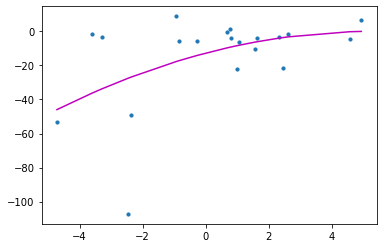

In [45]:
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.scatter(x,y,s=10)
plt.plot(x, y_poly_pred, color='m')
plt.show()